In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def convertVel(num):
    bitstring = num.to_bytes(length=5, byteorder='big')
    manipulated = bitstring[-4:]
    return int.from_bytes(manipulated, byteorder='big', signed=True)

C:\Users\maril\AppData\Local\Temp\ipykernel_24468\2725792644.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(FILENAME, sep = ', ', header=0, index_col=False)
C:\Users\maril\AppData\Local\Temp\ipykernel_24468\2725792644.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['servoVel'].iloc[index] = convertVel(val)


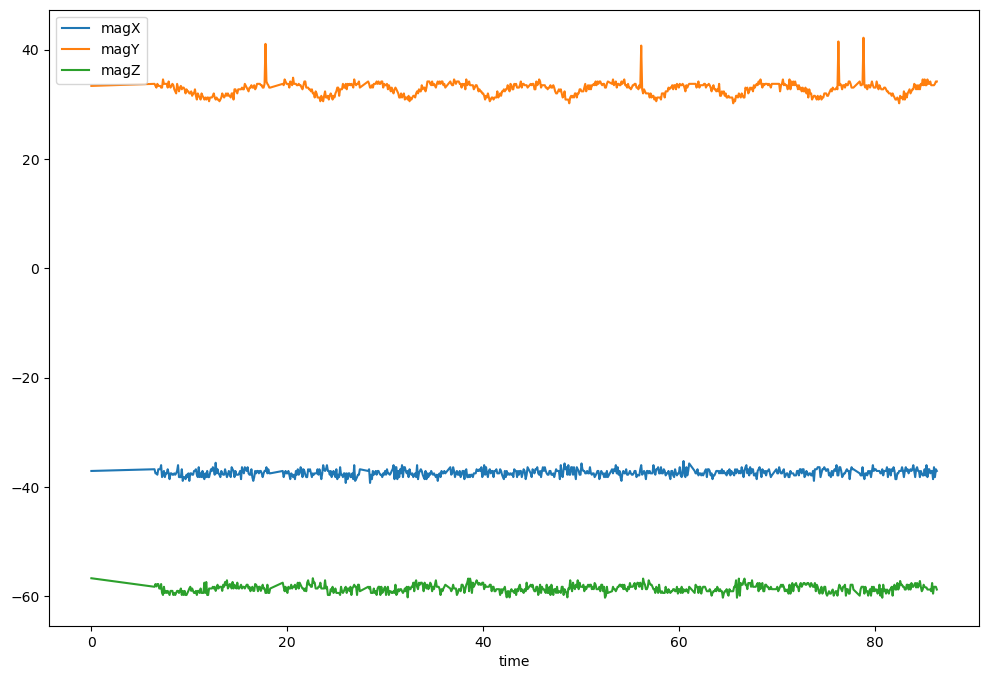

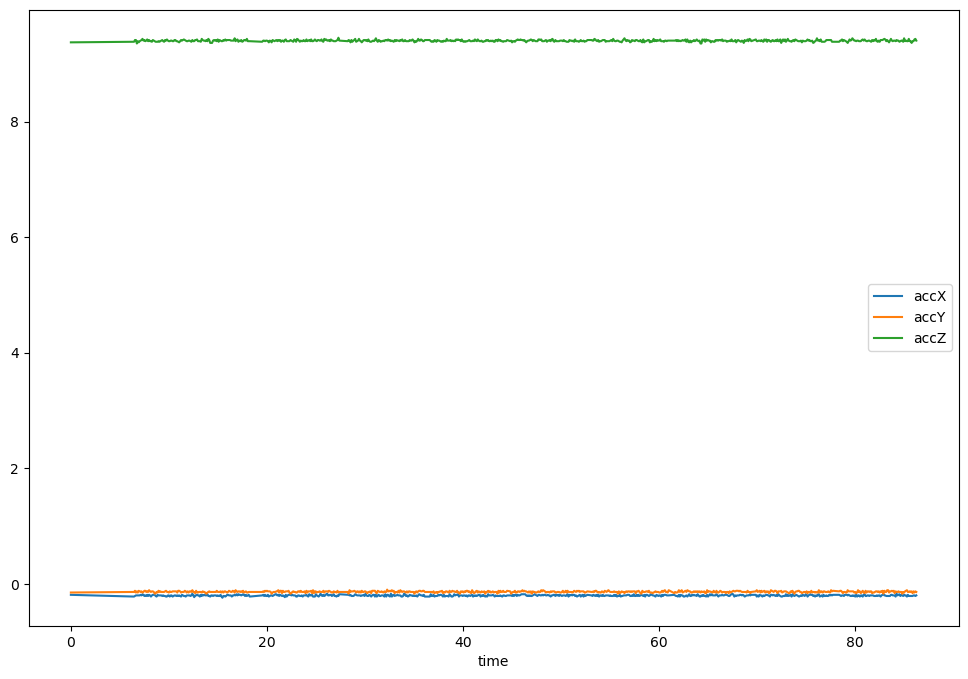

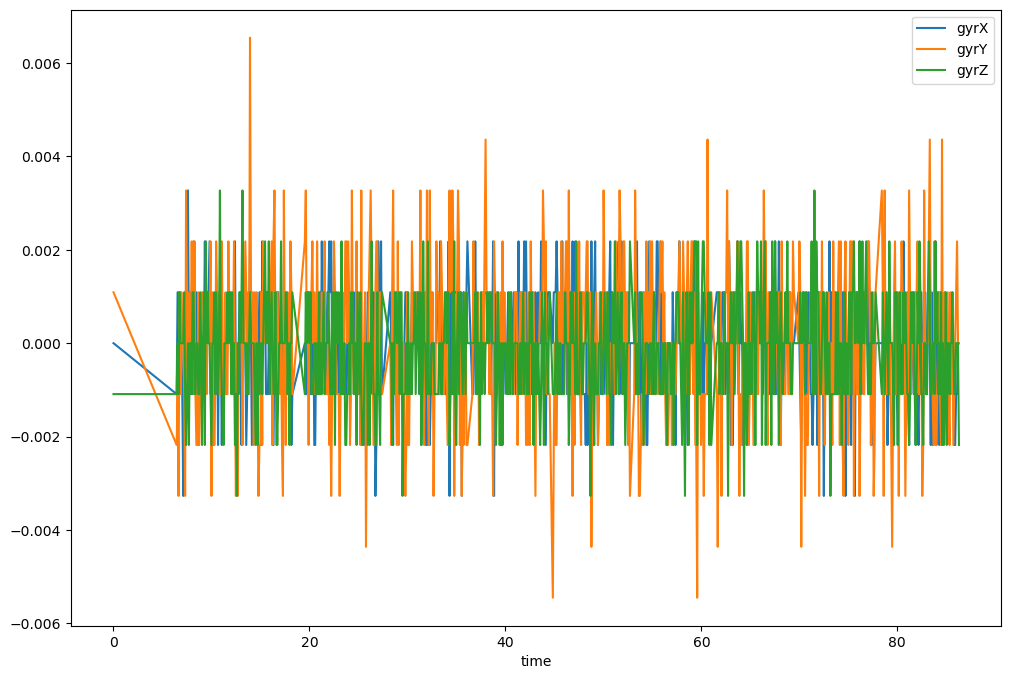

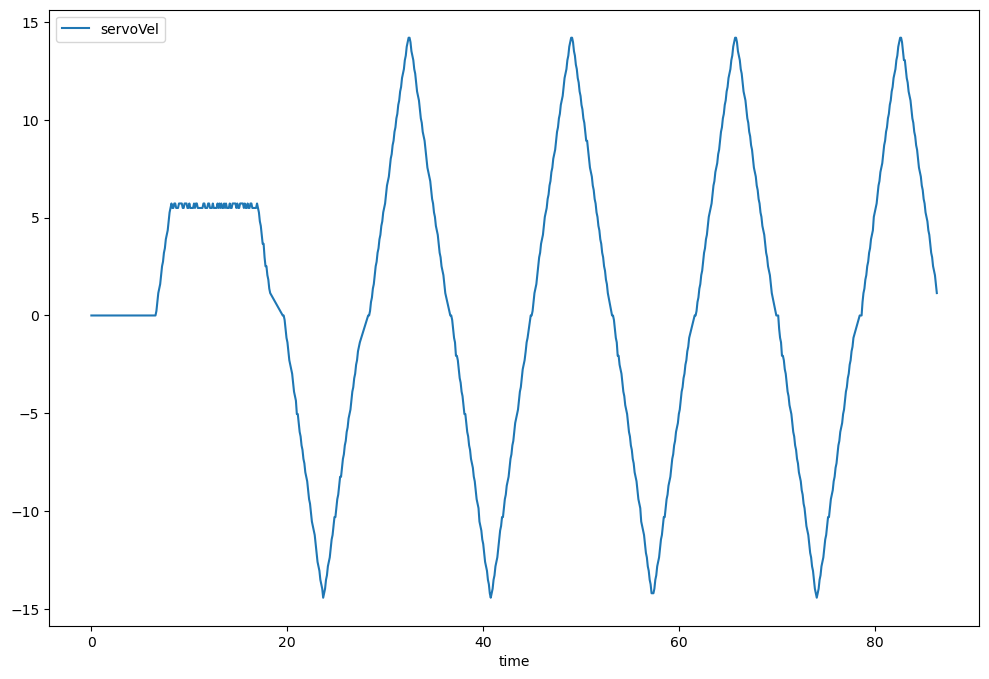

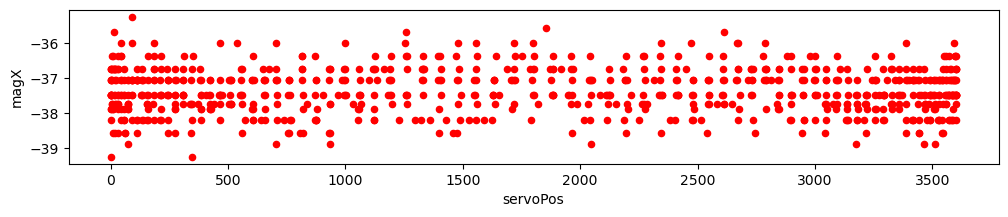

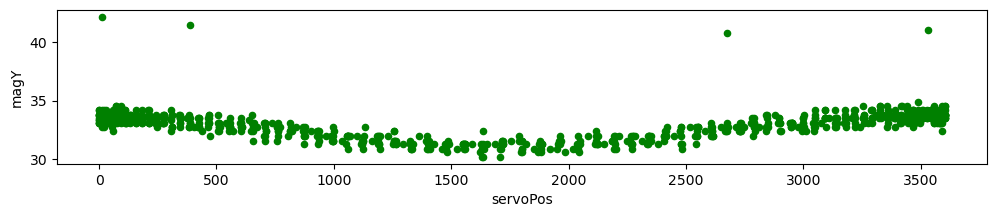

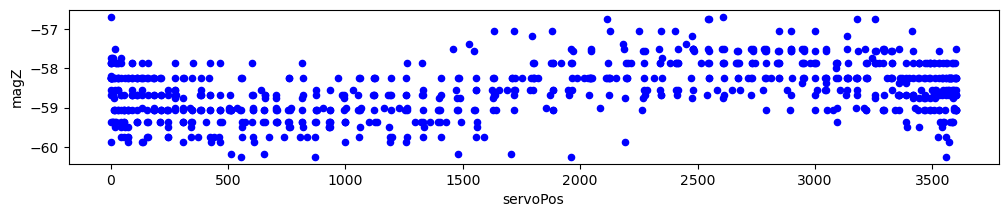

              magX     magY     magZ
time                                
0.000000  -37.0625  33.3750 -56.6875
6.446497  -36.7500  33.7500 -58.2500
6.542469  -37.5000  33.3750 -57.7500
6.638393  -37.5000  33.0625 -58.1875
6.734369  -37.7500  33.7500 -57.7500
...            ...      ...      ...
85.903755 -38.5625  33.5000 -59.5000
85.999773 -36.3750  33.5000 -58.2500
86.095783 -38.1875  33.7500 -58.2500
86.191799 -36.7500  34.1875 -58.2500
86.287763 -37.0625  34.1875 -58.7500

[787 rows x 3 columns]
           accX  accY  accZ
time                       
0.000000  -0.19 -0.15  9.37
6.446497  -0.22 -0.14  9.38
6.542469  -0.21 -0.12  9.41
6.638393  -0.20 -0.15  9.41
6.734369  -0.20 -0.13  9.35
...         ...   ...   ...
85.903755 -0.21 -0.16  9.39
85.999773 -0.20 -0.13  9.39
86.095783 -0.20 -0.15  9.42
86.191799 -0.21 -0.13  9.43
86.287763 -0.20 -0.14  9.40

[789 rows x 3 columns]
               gyrX      gyrY      gyrZ
time                                   
0.000000   0.000000  0.0010

In [14]:
FILENAME = "servoposition2023-04-24 14%3A24%3A43.046057.csv"
FILENAME = "servoposition2023-04-24 14%3A24%3A01.730985.csv"
FILENAME = "servoposition2023-04-25 11%3A07%3A10.462038.csv"
df = pd.read_csv(FILENAME, sep = ', ', header=0, index_col=False)
df['time'] = (df['time'] - df['time'].iloc[0])

df[['magX', 'magY', 'magZ']] = df[['magX', 'magY', 'magZ']][df[['magX', 'magY', 'magZ']] < 500].dropna()

for index, val in enumerate(df['servoVel']):
    df['servoVel'].iloc[index] = convertVel(val)
df['servoVel'] = df['servoVel'] * 0.229
df['servoPos'] = df['servoPos'] * 0.88
mag = pd.pivot_table(df, index = ['time'], values= ['magX', 'magY', 'magZ'])
gyr = pd.pivot_table(df, index = ['time'], values= ['gyrX', 'gyrY', 'gyrZ'])
acc = pd.pivot_table(df, index = ['time'], values= ['accX', 'accY', 'accZ'])
servo = pd.pivot_table(df, index = ['time'], values= ['servoPos', 'servoVel', 'servoCur'])

mag.plot(figsize=(12, 8))
acc.plot(figsize=(12, 8))
gyr.plot(figsize=(12, 8))
servo.plot(y='servoVel', figsize=(12, 8))


df.plot(kind='scatter', x='servoPos', y='magX', color='r', figsize=(12, 2))
df.plot(kind='scatter', x='servoPos', y='magY', color='g', figsize=(12, 2))
df.plot(kind='scatter', x='servoPos', y='magZ', color='b', figsize=(12, 2))
#scatter = pd.pivot_table(df, index = 'servoPos', values = ['magX', 'magY', 'magZ'])
#scatter.plot()
plt.show()

print(mag)
print(acc)
print(gyr)
print(servo)
